In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
#Describe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


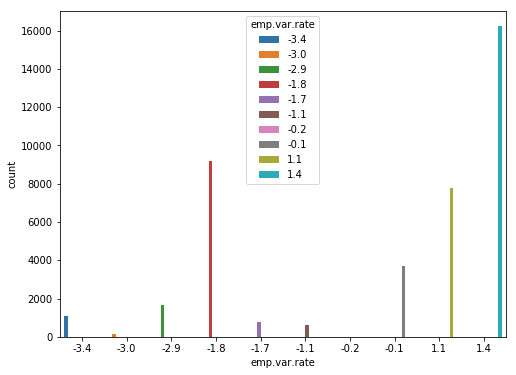

In [7]:
#plotting employment variation rate - quarterly indicator emp.var.rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=df)

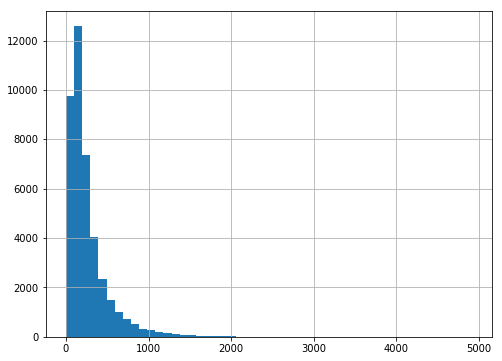

In [8]:
# plotting a histogram of duration is shown below
df['duration'].hist(bins=50)

In [9]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [10]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [11]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0, 0.5, 'Frequency')

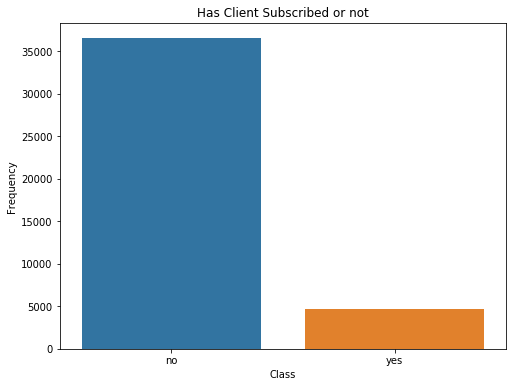

In [12]:
#plt.figure(figsize=(10,8))
sns.countplot(df['y'])
plt.title('Has Client Subscribed or not')
plt.xlabel('Class')
plt.ylabel('Frequency')

Our data is highly imbalance

### Doing necessary datatype conversion

In [13]:
df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']] = df[['job','marital',
                                                                                                              'education','default','housing','loan','contact','month','day_of_week','poutcome']].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: category(10), float64(5

## Dealing with categorical variables

### Creating dummy

In [15]:
df1 = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan',
                   'contact','month','day_of_week','poutcome'],drop_first=True)

In [16]:
df.shape

(41188, 21)

In [17]:
df1.shape

(41188, 54)

In [18]:
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null object
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employe

In [20]:
df1['y'] = df1['y'].replace('no','0')
df1['y'] = df1['y'].replace('yes','1')

In [21]:
df1['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [22]:
df1['y'] = df1['y'].astype('int64')

In [23]:
df1.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown 

## Splitting the data into train and test

In [24]:
X = df1.drop('y',axis=1)
y = df1['y']

### Applying the SMOTE 

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (28831, 53)
Number transactions y_train dataset:  (28831,)
Number transactions X_test dataset:  (12357, 53)
Number transactions y_test dataset:  (12357,)


In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3261
Before OverSampling, counts of label '0': 25570 

After OverSampling, the shape of train_X: (51140, 53)
After OverSampling, the shape of train_y: (51140,) 

After OverSampling, counts of label '1': 25570
After OverSampling, counts of label '0': 25570


## Model Building

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train_res,y_train_res)

C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the nu

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [29]:
## Lets predict probability of 1 and 0 for X_train and X_test

log_train_pred_probability=log.predict_proba(X_train_res)
log_test_pred_probability=log.predict_proba(X_test)

### Logistic Regression Model Prediction for train and test

In [30]:
log.predict_proba(X_train_res)[:,1]


array([0.01125365, 0.98844933, 0.01551036, ..., 0.97602438, 0.96801074,
       0.99994837])

C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


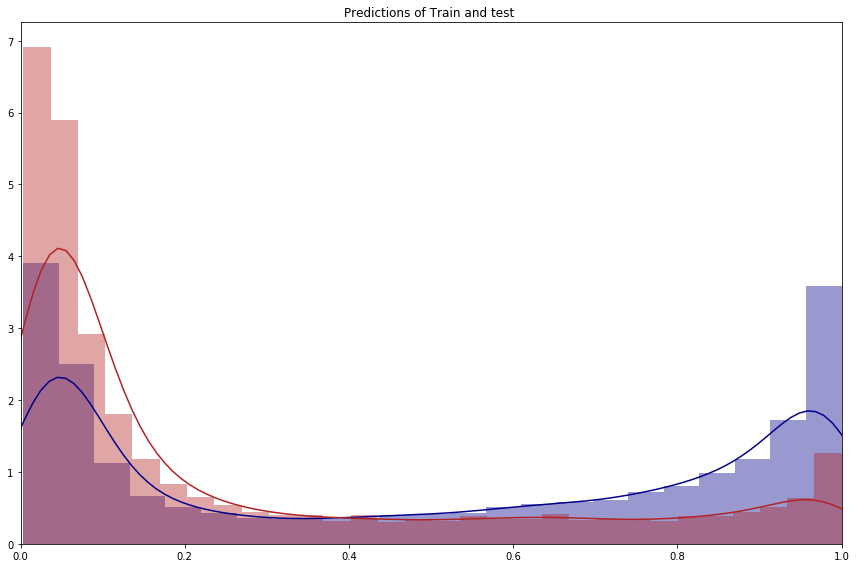

In [31]:
# Lets compare model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train_res)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_test)[:,1],color='firebrick')
plt.title('Predictions of Train and test ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

### Logistic Regression ROC Curve

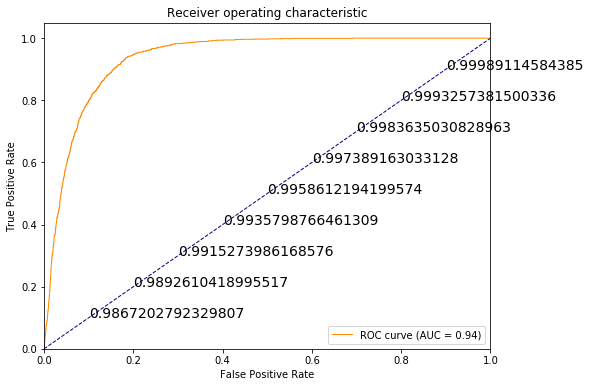

In [32]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test,log.predict_proba(X_test)[:,1])         #log_test_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [33]:
fpr, tpr, thresholds =roc_curve(y_test, log.predict_proba(X_test)[:,1],pos_label=1)     #log_test_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.936193


### Logistic Regression: Precision vs Recall

Text(0.5, 1.0, 'Precision Vs Recall')

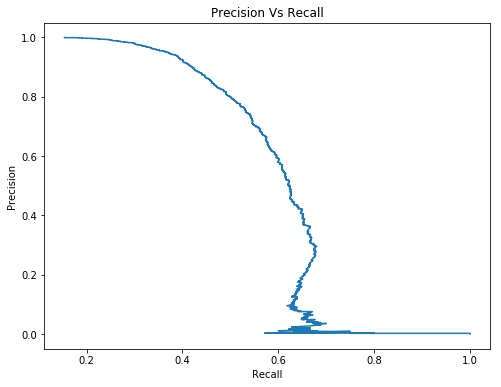

In [34]:
## Lets Check precision and recall 
precision, recall, _ = precision_recall_curve(y_test, log.predict_proba(X_test)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

### Logostic Regression: Evaluation

In [35]:
## Lets Set probability Threshold to 0.50

log_train_pred_50=(log.predict_proba(X_train_res)[:,1]>0.50).astype(bool)
log_test_pred_50=(log.predict_proba(X_test)[:,1]>0.50).astype(bool)   # set threshold as 0.50

In [36]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train_res, log_train_pred_50,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, log_test_pred_50,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('\nAccuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('\nSensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('\nSpecificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_test, log_test_pred_50)
print("\nKappa Value :",KappaValue)
AUC=roc_auc_score(y_test, log_test_pred_50)

print("\nAUC         :",AUC)

print("\nF1-Score Train  : ",f1_score(y_train_res, log_train_pred_50))

print("F1-Score Test  : ",f1_score(y_test, log_test_pred_50))

Confusion Matrix Train : 
 [[22740  2830]
 [ 3651 21919]]
Confusion Matrix Test: 
 [[1216  163]
 [1573 9405]]

Accuracy Train:  0.8732694563942119
Accuracy Val:  0.8595128267378813

Sensitivity Train :  0.8893234258897145
Sensitivity Val:  0.8817984046410442

Specificity Train:  0.8572154868987094
Specificity Val:  0.8567134268537074

Kappa Value : 0.5103671572075121

AUC         : 0.8692559157473758

F1-Score Train  :  0.8752718384942553
F1-Score Test  :  0.5834932821497121


### Random Forest

In [37]:
## Lets Apply Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   
# We will set max_depth =4

In [39]:
rfc.fit(X_train_res,y_train_res)  #fit the model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=123, verbose=0, warm_start=False)

### Random Forest ROC Curve

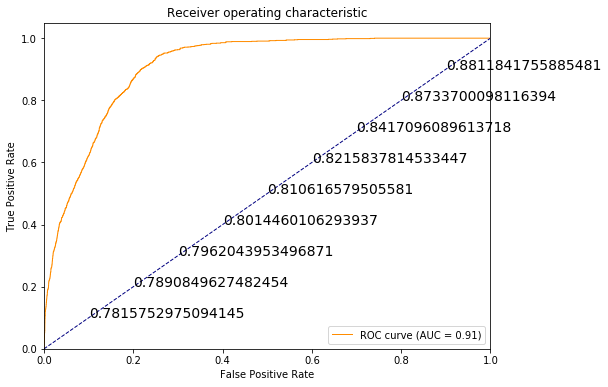

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [41]:
fpr, tpr, thresholds =roc_curve(y_test, rfc.predict_proba(X_test)[:,1],pos_label=1)     
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.907732


### Random Forest: TPR vs FPR

C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


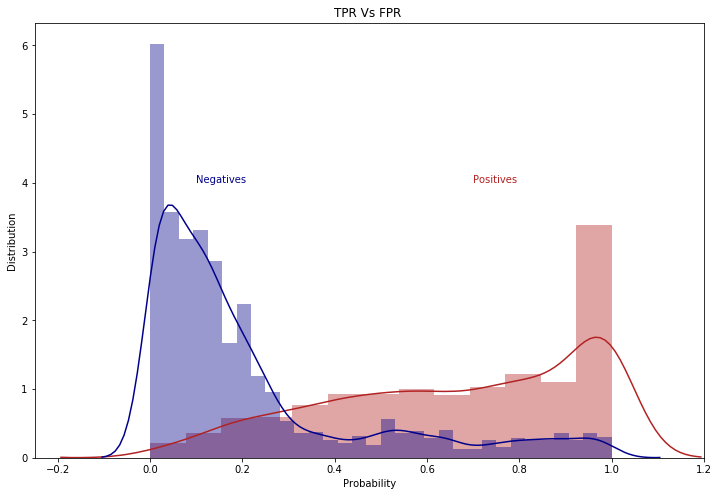

In [42]:
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [43]:
rfc_train_pred = (rfc.predict_proba(X_train_res)[:,1]>0.5).astype(bool)# Set threshold to 0.5
rfc_test_pred = (rfc.predict_proba(X_test)[:,1]>0.5).astype(bool)

### Random Forest: Model Evaluation

In [44]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train_res, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, rfc_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('\nAccuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, rfc_test_pred)
print("\nKappa Value :",KappaValue)
AUC=roc_auc_score(y_test, rfc_test_pred)
print("\nAUC         :",AUC)


print("\nF1-Score Train",f1_score(y_train_res,rfc_train_pred))
print("F1-Score Test : ",f1_score(y_test, rfc_test_pred))

Confusion Matrix Train : 
 [[23071  2499]
 [ 2888 22682]]
Confusion Matrix Test: 
 [[ 923  456]
 [1250 9728]]

Accuracy Train :  0.8946617129448573
Accuracy Test :  0.8619406004693696

Sensitivity :  0.6693255982596084
Specificity :  0.8861359081799963

Kappa Value : 0.4437562749133023

AUC         : 0.7777307532198023

F1-Score Train 0.8954569271672261
F1-Score Test :  0.5197072072072072


### Other Models And there Performance

In [45]:
## Lets import packages 
from collections import Counter
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pprint

In [46]:
clfs = {
    'rfc': RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(class_weight='balanced'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(class_weight='balanced')
}

In [47]:
## Lets Fit These models and check their performance 

f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_res, y_train_res)
    y_pred =((clf.predict_proba(X_test)[:,1]>0.5).astype(bool))
    f1_scores[clf_name] = f1_score(y_pred, y_test)

rfc
ada
dtc
gbc
lr


C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
pprint.pprint(f1_scores) #Printing F1 Scores

{'ada': 0.5575984990619137,
 'dtc': 0.49520426287744224,
 'gbc': 0.5947480482611781,
 'lr': 0.584942084942085,
 'rfc': 0.5197072072072072}


In [49]:
acc_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_res, y_train_res)
    y_pred =((clf.predict_proba(X_test)[:,1]>0.5).astype(bool))
    acc_scores[clf_name] = accuracy_score(y_pred, y_test)

rfc
ada
dtc
gbc
lr


C:\Users\Lalit Chaudhari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
pprint.pprint(acc_scores)

{'ada': 0.9045884923525127,
 'dtc': 0.8872703730678967,
 'gbc': 0.9075827466213482,
 'lr': 0.8608076393946751,
 'rfc': 0.8619406004693696}


#### Above figures shows that Gradient boosting classifier model is performing better compared to other models.